In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [4]:
query1 = """
DESCRIBE animal_beauty_business
"""
query2 = """
SHOW tables
"""
# pd.read_sql(query1, engine)
pd.read_sql(query2, engine)

,Tables_in_eda
0,animal_beauty_business
1,animal_hospital_registry
2,animal_pharmacy_registry
3,companion_animal_registration
4,korea_urban_park_info
5,per_capita_park_area
6,pollution_emission_facility
7,seoul_abandoned_animal_status
8,seoul_abandonment_statistics
9,seoul_animal_hospital


In [5]:
# ▶️ animal_beauty_business 등록 데이터 가져오기
query = """
SELECT *
FROM animal_beauty_business
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,work_division,work_detail_division,right_holder_serial,total_staff,created_at
0,1,동물미용업,02_03_11_P,4641000,464100004920240009,2024-05-31,None,1,영업/정상,0,...,U,2025-06-22,None,210710.076024,258090.564416,동물미용업,동물미용업(일반),000,0,2025-07-03 11:04:02
1,2,동물미용업,02_03_11_P,3630000,363000004920240002,2024-01-15,None,1,영업/정상,0,...,I,2024-01-18,None,181487.039923,187307.346855,동물미용업,동물미용업(일반),000,0,2025-07-03 11:04:02
2,3,동물미용업,02_03_11_P,3600000,360000004920240001,2024-01-16,None,1,영업/정상,0,...,I,2024-01-18,None,189225.317025,180297.160091,동물미용업,동물미용업(일반),000,0,2025-07-03 11:04:02
3,4,동물미용업,02_03_11_P,3660000,366000004920230002,2023-01-31,None,1,영업/정상,0,...,I,2023-02-02,None,234013.141213,314452.046841,동물미용업,동물미용업(일반),000,0,2025-07-03 11:04:02
4,5,동물미용업,02_03_11_P,3520000,352000004920220024,2022-11-30,None,1,영업/정상,0,...,I,2022-12-02,None,167258.949937,432714.360271,동물미용업,동물미용업(일반),000,0,2025-07-03 11:04:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,14633,동물미용업,02_03_11_P,3020000,302000004920200005,2020-04-10,None,4,취소/말소/만료/정지/중지,4,...,U,2024-12-11,None,200231.538141,448226.481351,동물미용업,동물미용업(일반),000,0,2025-07-03 11:05:28
14633,14634,동물미용업,02_03_11_P,3000000,300000004920180006,2018-08-31,None,4,취소/말소/만료/정지/중지,4,...,U,2023-11-04,None,200857.831023,452546.949042,동물미용업,동물미용업(일반),000,0,2025-07-03 11:05:28
14634,14635,동물미용업,02_03_11_P,3000000,300000004920180016,2018-10-17,None,4,취소/말소/만료/정지/중지,4,...,U,2023-11-04,None,201335.490343,452532.491901,동물미용업,동물미용업(일반),000,0,2025-07-03 11:05:28
14635,14636,동물미용업,02_03_11_P,3000000,300000004920180017,2018-10-18,None,4,취소/말소/만료/정지/중지,4,...,U,2023-06-16,None,200126.766304,452265.173518,동물미용업,동물미용업(일반),000,0,2025-07-03 11:05:28


In [6]:

# ▶️ 서울 동물미용업 관련 인허가 정보 가져오기
  # 영업/정상 : 필터링
  # 서울특별시 : 지역으로 필터링
  
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,business_type_name,business_type_detail,right_holder_serial,total_personnel,created_at
0,83,동물약국,02_03_02_P,3140000,314000001120150005,2015-07-07,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,185494.645272,447737.318006,동물약국,None,000,NaN,2025-07-03 11:08:05
1,84,동물약국,02_03_02_P,3030000,303000001120140003,2014-11-17,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202527.370519,450941.849941,동물약국,None,000,NaN,2025-07-03 11:08:05
2,85,동물약국,02_03_02_P,3030000,303000001120150001,2015-01-09,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204712.095250,448359.934294,동물약국,None,000,NaN,2025-07-03 11:08:05
3,86,동물약국,02_03_02_P,3030000,303000001120150004,2015-08-12,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204788.453049,448470.237859,동물약국,None,000,NaN,2025-07-03 11:08:05
4,87,동물약국,02_03_02_P,3030000,303000001120150005,2015-08-21,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202401.066045,451809.190992,동물약국,None,000,NaN,2025-07-03 11:08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,12717,동물약국,02_03_02_P,3150000,315000001120240025,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,186386.587594,447781.141806,동물약국,None,000,0.0,2025-07-03 11:13:58
2630,12720,동물약국,02_03_02_P,3150000,315000001120240026,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,188612.842595,449897.366377,동물약국,None,000,0.0,2025-07-03 11:13:58
2631,12721,동물약국,02_03_02_P,3220000,322000001120240058,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,201543.962547,446856.814680,동물약국,None,000,0.0,2025-07-03 11:13:58
2632,12722,동물약국,02_03_02_P,3220000,322000001120240059,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,203092.721986,442550.634568,동물약국,None,000,0.0,2025-07-03 11:13:58


In [8]:
# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)

print(district_counts)

   district  beauty_count
0       강남구           287
1       송파구           180
2       서초구           158
3       강동구           156
4       강서구           146
5       은평구           125
6       관악구           118
7       노원구           117
8      영등포구           116
9       마포구           115
10      구로구            92
11     동대문구            92
12      광진구            89
13      중랑구            88
14      성북구            87
15      양천구            83
16      종로구            81
17     서대문구            78
18      도봉구            73
19      강북구            69
20      동작구            67
21      성동구            66
22      금천구            62
23       중구            57
24      용산구            32


/home/park/eda-repo-3/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


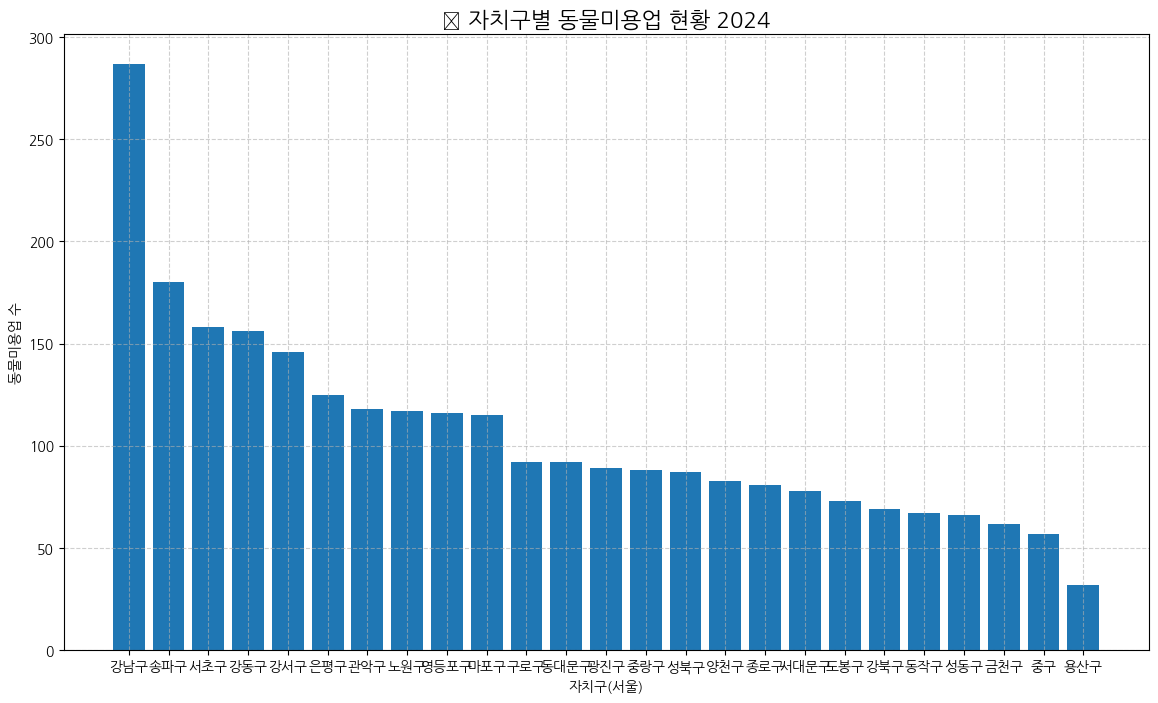

In [9]:
# ▶️ 시각화 (자치구별 연도별 유기견 발생 추이)
plt.figure(figsize=(14, 8))
plt.bar(district_counts['district'], district_counts['beauty_count'])
plt.title("✅ 자치구별 동물미용업 현황 2024", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("동물미용업 수")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()